In [3]:
%matplotlib widget
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from Individual import Individual, FTYPE
from Population import Population
from RNASeqDeconvolution import RNASeqDeconvolution
from main import compare, set_parameters, compare_to_true_results

# TRY 1

In [ ]:
# run and display output phenotype
experiment = set_parameters({"pop_size": 300, "max_iter": 50000, "mut_prob": 5e-4, "mut_standard_deviation": 1, "stagnation_diff": 5e-4, "init_sigma": 5, "carry_over": 1}, True)
experiment.run(True, 0, True)
phen = experiment.result

running RNA-seq deconvolution:   0%|                                                                          …

In [ ]:
# fitness score
print(experiment.result_fitness_score)

In [ ]:
# best/worst score per iteration graph
fig, ax = plt.subplots()
best, worst = experiment.best_history, experiment.worst_history
mean = experiment.mean_history
l = np.arange(len(best))
line1 = ax.plot(l, best, label="best fitness", zorder=10)
line2 = ax.plot(l, worst, label="worst fitness", linestyle="--", zorder=1)
line3 = ax.plot(l, mean, label="mean fitness", zorder=2)
# ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness score")
ax.set_title("Best/Worst score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
compare_to_true_results(phen)

# TRY 2

In [14]:
# run and display output phenotype
experiment = set_parameters({"pop_size": 300, "max_iter": 50000, "mut_prob": 5e-4, "mut_standard_deviation": 1, "stagnation_diff": 5e-4, "init_sigma": 5}, True)
experiment.run(True, 0, True)
phen = experiment.result

running RNA-seq deconvolution:   0%|                                                                          …

100 consecutive stagnant iterations


In [ ]:
# fitness score
print(experiment.result_fitness_score)

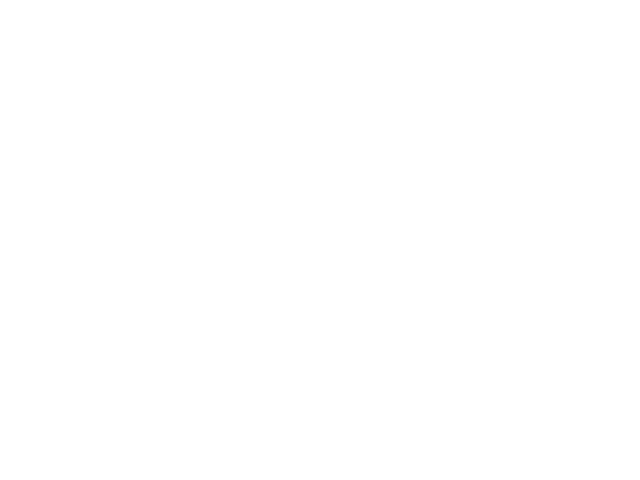

In [15]:
# best/worst score per iteration graph
fig, ax = plt.subplots()
best, worst = experiment.best_history, experiment.worst_history
mean = experiment.mean_history
l = np.arange(len(best))
line1 = ax.plot(l, best, label="best fitness", zorder=10)
line2 = ax.plot(l, worst, label="worst fitness", linestyle="--", zorder=1)
line3 = ax.plot(l, mean, label="mean fitness", zorder=2)
# ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness score")
ax.set_title("Best/Worst score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
compare_to_true_results(phen)

# TRY 3

In [12]:
# run and display output phenotype
experiment = set_parameters({"pop_size": 300, "max_iter": 50000, "mut_prob": 1e-4, "mut_standard_deviation": 1, "stagnation_diff": 5e-4, "init_sigma": 5}, True)
experiment.run(True, 0, True)
phen = experiment.result

running RNA-seq deconvolution:   0%|                                                                          …

100 consecutive stagnant iterations


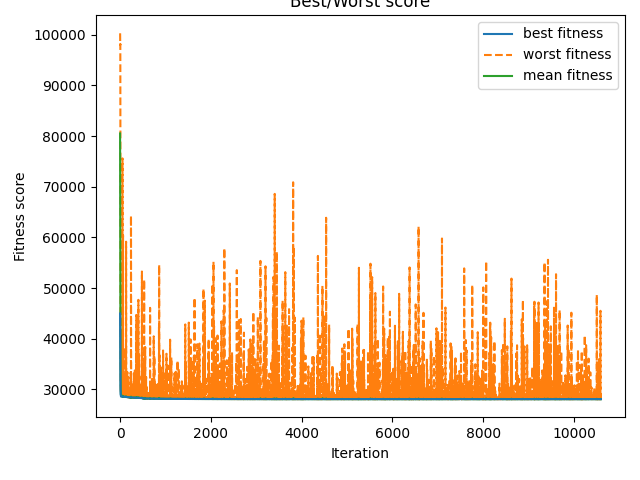

In [13]:
# best/worst score per iteration graph
fig, ax = plt.subplots()
best, worst = experiment.best_history, experiment.worst_history
mean = experiment.mean_history
l = np.arange(len(best))
line1 = ax.plot(l, best, label="best fitness", zorder=10)
line2 = ax.plot(l, worst, label="worst fitness", linestyle="--", zorder=1)
line3 = ax.plot(l, mean, label="mean fitness", zorder=2)
# ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness score")
ax.set_title("Best/Worst score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()